In [ ]:
# Customer Analytics Project
# Dataset: Customer Feedback (Complaints & Commendations) {https://github.com/DAIZYGUPTA/customer-analytics-bi-project/blob/main/data/mta-customer-feedback-data-beginning-2014-1.csv}
# Objective: Clean data, analyze trends, and export cleaned dataset for Power BI


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline


In [4]:
# Load the raw dataset
df = pd.read_csv("../data/mta-customer-feedback-data-beginning-2014-1.csv")

df.head()


,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Long Island Rail Road,Commendation,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,No Value
1,Long Island Rail Road,Commendation,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,Port Jefferson
2,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,NaN,2015,1,No Value
3,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Other,2015,2,Far Rockaway
4,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Very Helpful / Friendly,2015,2,No Value


In [5]:
# Dataset shape
print("Dataset shape (rows, columns):", df.shape)

# Column names and data types
print("\nDataset info:")
print(df.info())

# Quick summary of missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Count of Complaints vs Commendations
print("\nFeedback type counts:")
print(df["Commendation or Complaint"].value_counts())



Dataset shape (rows, columns): (183887, 8)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183887 entries, 0 to 183886
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Agency                     183887 non-null  object
 1   Commendation or Complaint  183887 non-null  object
 2   Subject Matter             183887 non-null  object
 3   Subject Detail             183887 non-null  object
 4   Issue Detail               173753 non-null  object
 5   Year                       183887 non-null  int64 
 6   Quarter                    183887 non-null  int64 
 7   Branch/Line/Route          183887 non-null  object
dtypes: int64(2), object(6)
memory usage: 11.2+ MB
None

Missing values per column:
Agency                           0
Commendation or Complaint        0
Subject Matter                   0
Subject Detail                   0
Issue Detail                 10134
Year         

In [13]:
df['Commendation or Complaint'].value_counts(normalize=True)*100

Commendation or Complaint
Complaint       96.087815
Commendation     3.912185
Name: proportion, dtype: float64

In [14]:
# INSIGHTS:  

#The dataset is heavily imbalanced: ~96% complaints vs only ~4% commendations.

#This shows that customers usually report negative experiences more often than positive ones.

In [16]:
df.describe(include = 'all')

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
count,183887,183887,183887,183887,173753,183887.000000,183887.000000,183887
unique,4,2,17,140,220,NaN,NaN,462
top,NYC Buses,Complaint,Employees,Bus Operator / Driver,Late / Delay,NaN,NaN,No Value
freq,98508,176693,74925,57063,15281,NaN,NaN,40171
mean,NaN,NaN,NaN,NaN,NaN,2015.737991,2.756938,NaN
std,NaN,NaN,NaN,NaN,NaN,0.815389,1.110994,NaN
min,NaN,NaN,NaN,NaN,NaN,2014.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2015.000000,2.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,2016.000000,3.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,2016.000000,4.000000,NaN


In [7]:
df['Agency'].value_counts()

Agency
NYC Buses                98508
Subways                  57163
Long Island Rail Road    15780
Metro-North Railroad     12436
Name: count, dtype: int64

In [8]:
df['Subject Detail'].value_counts()

Subject Detail
Bus Operator / Driver             57063
Bus / Vehicle - General           29549
Train - General                   13610
Rail / Subway Cars                11172
Ticket Machines                    7031
                                  ...  
Deferred Toll Payment                 1
Call Ahead Service                    1
Bar Special Services Attendant        1
Resident Discount - Other             1
Mobile Sales Staff                    1
Name: count, Length: 140, dtype: int64

In [9]:
df['Subject Matter'].value_counts()

Subject Matter
Employees                                 74925
Travel Disruption / Trip Problem          40313
Station /Bus Stop /Facility /Structure    29002
Trains                                    13619
Buses                                      7591
Telephone / Website / Mobile Apps          5023
Policies, Rules & Regulations              4465
MetroCard/Tickets/E-Zpass & Tolls          3007
Customer                                   2796
Schedules / Reservations                   2735
Construction / Capital Projects             203
MTA Agency Cars / Trucks                    153
Public Hearing                               22
Reasonable Modification                      19
Ferry Service - Hudson River                  7
Commendation                                  6
Complaint                                     1
Name: count, dtype: int64

In [10]:
df['Issue Detail'].unique()

array(['Very Helpful/Friendly', nan, 'Other', 'Very Helpful / Friendly',
       'Performance Under Stress', 'Accuracy / Correctness - Audio',
       'Completeness / Sufficiency - Audio', 'Frequency - Audio',
       'Honesty/Integrity', 'Lost or Stolen Ticket / MetroCard',
       'Cleanliness', 'Clarity - Visual / Text', 'User Friendly',
       'Accuracy / Correctness - Visual / Text',
       'Timeliness - Visual / Text', 'Size', 'Frequency - Visual / Text',
       'Reckless Driving', 'Disputes', 'Non-Work Related Distractions',
       'Did Not Correct Conduct of Passenger', 'Lost While Driving',
       'Not Helpful', 'Rude / Inappropriate Language',
       'Incorrect Information Displayed', 'Call Terminated/Hung Up',
       'Lack of Information', 'Long Wait / Long Lines',
       'Slow Performance', 'Smoking', 'Trespass', 'Vegetation Removal',
       'Not Seen / Not Available', 'Summons / Violation',
       'Add More / Not Enough', 'Incorrect Change Given',
       'Incorrect Fare Charge

In [17]:
df.rename(columns={
    'Commendation or Complaint': 'Feedback_Type',
    'Subject Matter': 'Subject',
    'Subject Detail': 'Detail',
    'Issue Detail': 'Issue',
    'Branch/Line/Route': 'Branch'
}, inplace=True)


In [18]:
df.columns

Index(['Agency', 'Feedback_Type', 'Subject', 'Detail', 'Issue', 'Year',
       'Quarter', 'Branch'],
      dtype='object')

In [19]:
df['Issue'] = df['Issue'].fillna('Unknown')


In [21]:
df['Branch'] = df['Branch'].replace('No Value', 'Unknown')


In [22]:
text_cols = ['Feedback_Type','Subject','Detail', 'Issue', 'Branch']
for col in text_cols:
    df[col] = df[col].str.strip().str.lower()

In [23]:
df['Issue'] = df['Issue'].replace({
    'very helpful/friendly': 'very helpful/friendly',
    'very helpful / friendly': 'very helpful/friendly',
    'very helpful friendly': 'very helpful/friendly',
    'not helpful': 'not helpful',
    'failed to id self': 'failed to id self',
    'not seen / not available': 'not seen/not available',
    'not seen/not available': 'not seen/not available',
    'rude / inappropriate language': 'rude/inappropriate language',
    'rude inappropriate language': 'rude/inappropriate language',
    'other': 'other',
    'add more / not enough': 'add more/not enough'
})


In [25]:
df['Issue'].unique()

array(['very helpful/friendly', 'unknown', 'other',
       'performance under stress', 'accuracy / correctness - audio',
       'completeness / sufficiency - audio', 'frequency - audio',
       'honesty/integrity', 'lost or stolen ticket / metrocard',
       'cleanliness', 'clarity - visual / text', 'user friendly',
       'accuracy / correctness - visual / text',
       'timeliness - visual / text', 'size', 'frequency - visual / text',
       'reckless driving', 'disputes', 'non-work related distractions',
       'did not correct conduct of passenger', 'lost while driving',
       'not helpful', 'rude/inappropriate language',
       'incorrect information displayed', 'call terminated/hung up',
       'lack of information', 'long wait / long lines',
       'slow performance', 'smoking', 'trespass', 'vegetation removal',
       'not seen/not available', 'summons / violation',
       'add more/not enough', 'incorrect change given',
       'incorrect fare charged', 'wrong metrocard/ticket

In [26]:
top_issues = df['Issue'].value_counts().head(20)
print(top_issues)


Issue
late / delay                               15281
rude/inappropriate language                12460
unknown                                    10134
flagging / failed to stop                   8833
other                                       7872
reckless driving                            7376
improper function/needs repair/damaged      7208
failure to make scheduled stop              5893
late / delay past                           5324
very helpful/friendly                       4920
not helpful                                 4539
not regulating service properly             4304
closed door before customer could board     4184
not working / out of service                3927
crowding                                    3603
a/c not available                           3432
add more/not enough                         3156
abandoned customer at station/stop          2791
late / delay current                        2558
pricing / payment / billing error           2525
Name: count, d

C:\Users\gupta\AppData\Local\Temp\ipykernel_18548\3612159384.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.values, y=top_20.index, palette='viridis')


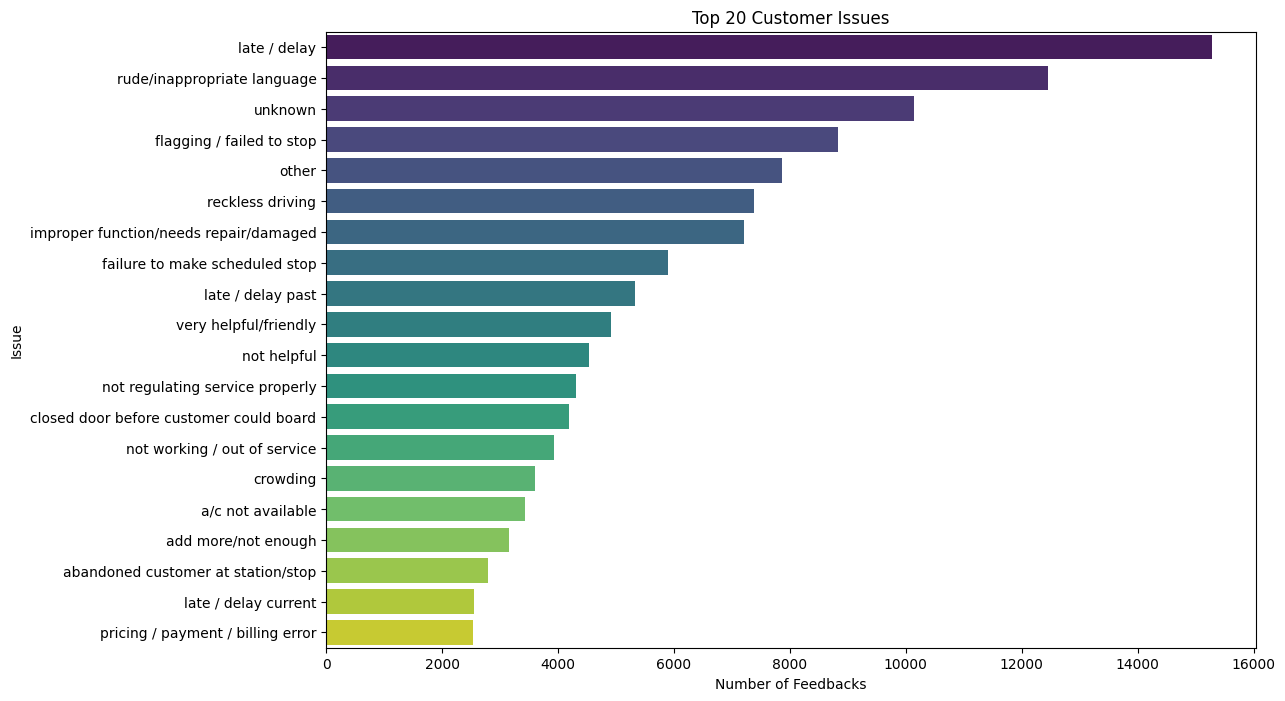

In [27]:
top_20 = df['Issue'].value_counts().head(20)

plt.figure(figsize=(12,8))
sns.barplot(x=top_20.values, y=top_20.index, palette='viridis')
plt.title("Top 20 Customer Issues")
plt.xlabel("Number of Feedbacks")
plt.ylabel("Issue")
plt.show()


In [ ]:
# INSIGHTS:

# Service Reliability & Delays dominate complaints.
# Staff behavior is also a major factor (rude/not helpful).
# Safety issues are critical (flagging / failed to stop, reckless driving, abandoned customer).
# Maintenance/comfort issues also matter (improper function, a/c not available, crowding).
# Positive feedback is present but small (~5k), mostly "very helpful/friendly".

In [28]:
df.drop_duplicates(inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86215 entries, 0 to 183886
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Agency         86215 non-null  object
 1   Feedback_Type  86215 non-null  object
 2   Subject        86215 non-null  object
 3   Detail         86215 non-null  object
 4   Issue          86215 non-null  object
 5   Year           86215 non-null  int64 
 6   Quarter        86215 non-null  int64 
 7   Branch         86215 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.9+ MB


In [35]:
print(df['Feedback_Type'].value_counts())
print("\n" , df['Subject'].value_counts())
print("\n" , df['Detail'].value_counts())
print("\n" , df['Issue'].value_counts().head(20))  # top issues
print("\n" , df['Branch'].value_counts())


Feedback_Type
complaint       82231
commendation     3984
Name: count, dtype: int64

 Subject
employees                                 37641
station /bus stop /facility /structure    16034
travel disruption / trip problem          12762
buses                                      5888
trains                                     5736
telephone / website / mobile apps          2311
policies, rules & regulations              2182
schedules / reservations                   1443
metrocard/tickets/e-zpass & tolls          1369
customer                                    668
mta agency cars / trucks                    103
construction / capital projects              35
public hearing                               20
reasonable modification                       9
ferry service - hudson river                  7
commendation                                  6
complaint                                     1
Name: count, dtype: int64

 Detail
bus operator / driver             29098
bus / vehicle -

In [36]:
def categorize_issue(issue):
    if 'late' in issue or 'failure to make scheduled stop' in issue:
        return 'Delays & Timeliness'
    elif 'rude' in issue or 'not helpful' in issue or 'helpful' in issue:
        return 'Staff Behavior'
    elif 'reckless' in issue or 'flagging' in issue or 'abandoned' in issue:
        return 'Safety'
    elif 'improper' in issue or 'not working' in issue or 'crowding' in issue or 'a/c' in issue:
        return 'Maintenance & Comfort'
    elif 'pricing' in issue or 'fare' in issue:
        return 'Financial / Payment'
    else:
        return 'Other'

df['Issue_Category'] = df['Issue'].apply(categorize_issue)

In [37]:
df['Issue_Category'].value_counts()

Issue_Category
Other                    54588
Staff Behavior            8433
Maintenance & Comfort     7622
Delays & Timeliness       7460
Safety                    7233
Financial / Payment        879
Name: count, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86215 entries, 0 to 183886
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agency          86215 non-null  object
 1   Feedback_Type   86215 non-null  object
 2   Subject         86215 non-null  object
 3   Detail          86215 non-null  object
 4   Issue           86215 non-null  object
 5   Year            86215 non-null  int64 
 6   Quarter         86215 non-null  int64 
 7   Branch          86215 non-null  object
 8   Issue_Category  86215 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.6+ MB


C:\Users\gupta\AppData\Local\Temp\ipykernel_18548\1960829817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Feedback_Type', data=df, palette='Set2')


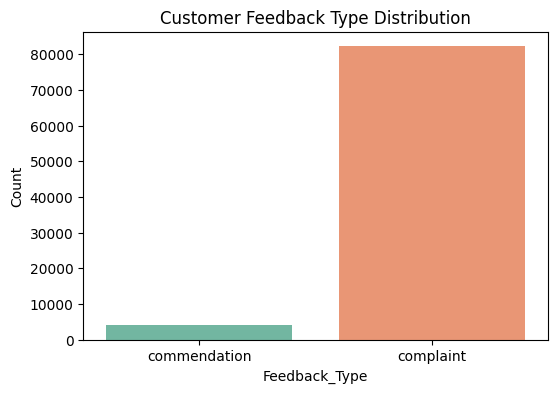

In [39]:
#  Feedback Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Feedback_Type', data=df, palette='Set2')
plt.title("Customer Feedback Type Distribution")
plt.ylabel("Count")
plt.show()



C:\Users\gupta\AppData\Local\Temp\ipykernel_18548\3589648219.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_issues.values, y=top_issues.index, palette='viridis')


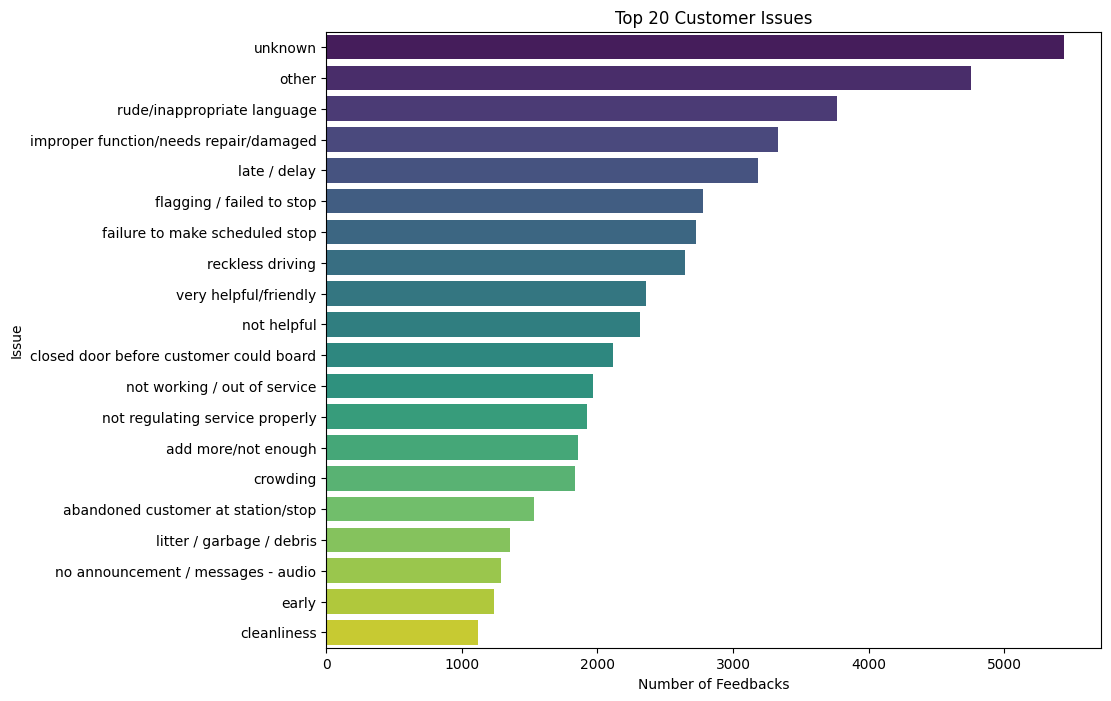

In [40]:
#  Top 20 Issues
top_issues = df['Issue'].value_counts().head(20)
plt.figure(figsize=(10,8))
sns.barplot(x=top_issues.values, y=top_issues.index, palette='viridis')
plt.title("Top 20 Customer Issues")
plt.xlabel("Number of Feedbacks")
plt.ylabel("Issue")
plt.show()

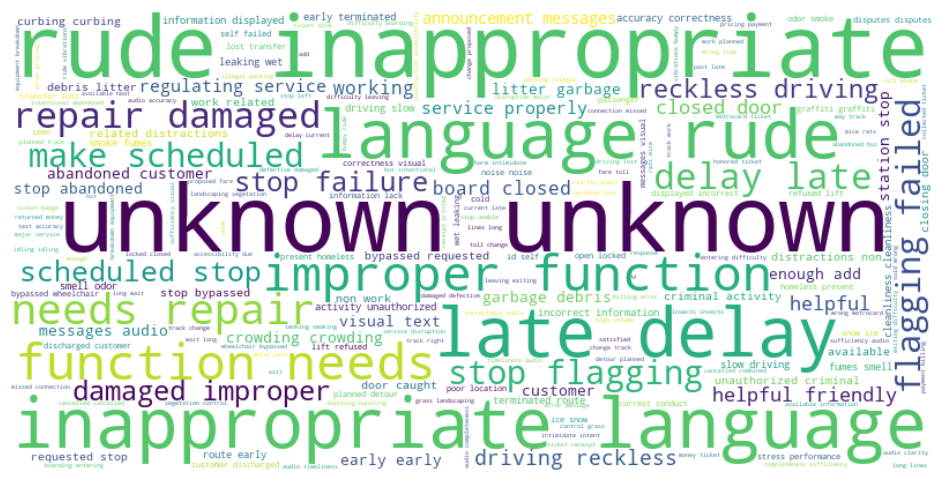

In [41]:
#  Word Cloud of Issues
all_issues = " ".join(df['Issue'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_issues)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

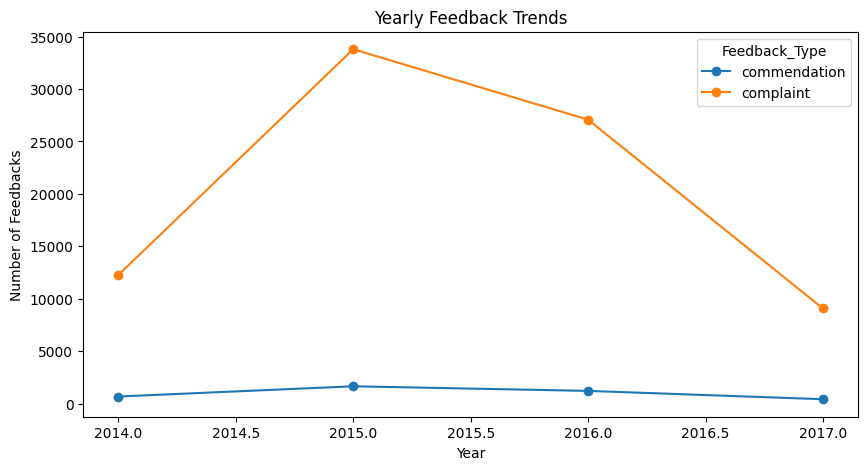

In [42]:
#  Trends over Years
yearly_feedback = df.groupby(['Year', 'Feedback_Type']).size().unstack().fillna(0)
yearly_feedback.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Yearly Feedback Trends")
plt.ylabel("Number of Feedbacks")
plt.show()

In [43]:
df.to_csv("cleaned_customer_feedback_final.csv", index=False)

print("Cleaned dataset exported successfully! Rows:", df.shape[0])

Cleaned dataset exported successfully! Rows: 86215


In [44]:
branch_feedback = df['Branch'].value_counts()
print(branch_feedback.head(20))  # Top 20 branches


Branch
unknown           9807
a                 1440
f                 1318
6                 1272
1                 1272
7                 1135
r                 1051
new haven         1043
e                 1043
2                 1019
n                 1016
hudson             966
babylon            921
port jefferson     917
d                  913
4                  912
harlem             908
q                  864
ronkonkoma         835
l                  793
Name: count, dtype: int64


C:\Users\gupta\AppData\Local\Temp\ipykernel_18548\3777196387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_branches.values, y=top_branches.index, palette='coolwarm')


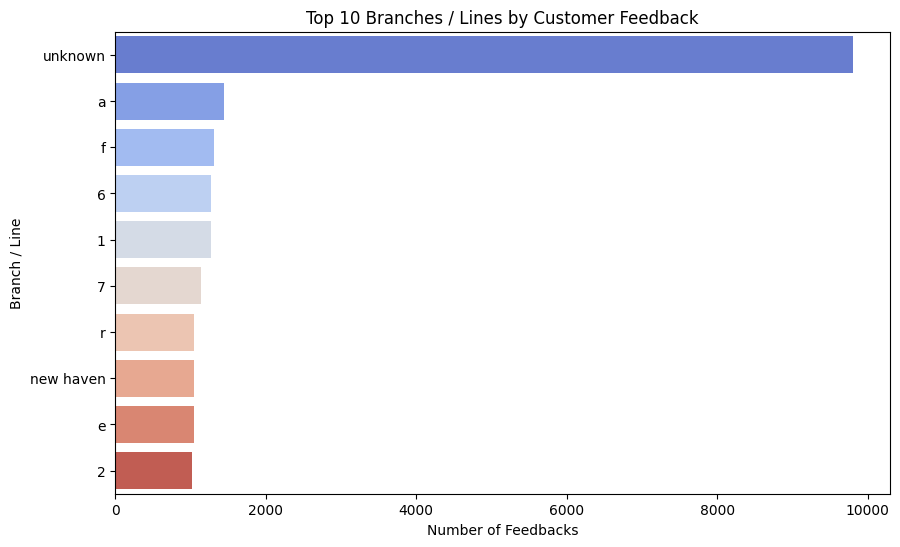

In [45]:
top_branches = branch_feedback.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_branches.values, y=top_branches.index, palette='coolwarm')
plt.title("Top 10 Branches / Lines by Customer Feedback")
plt.xlabel("Number of Feedbacks")
plt.ylabel("Branch / Line")
plt.show()


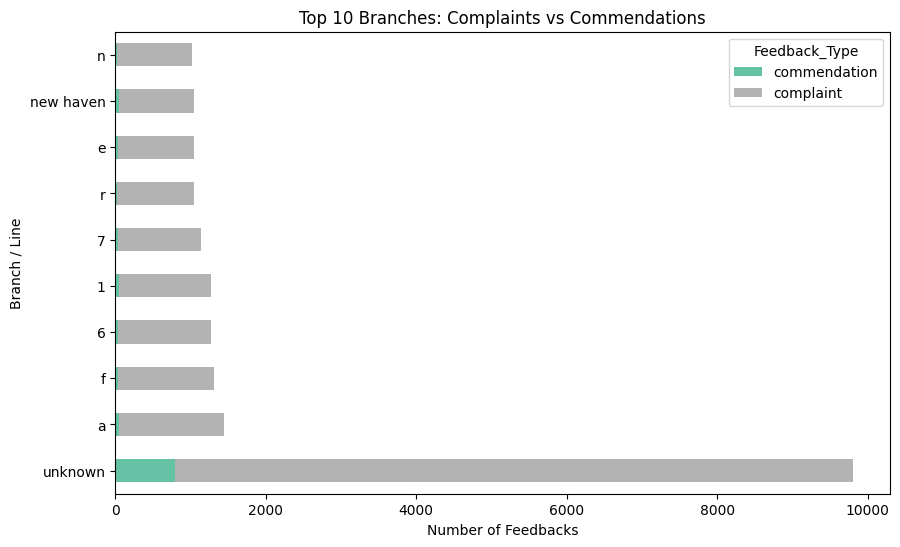

In [46]:
branch_type = df.groupby(['Branch', 'Feedback_Type']).size().unstack().fillna(0)
top_branch_type = branch_type.sort_values(by='complaint', ascending=False).head(10)

top_branch_type.plot(kind='barh', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Top 10 Branches: Complaints vs Commendations")
plt.xlabel("Number of Feedbacks")
plt.ylabel("Branch / Line")
plt.show()


In [47]:
# Top 15 branches by feedback count
top_15_branches = df['Branch'].value_counts().head(15).index

# Create new column with grouped branches
df['Branch_Grouped'] = df['Branch'].apply(lambda x: x if x in top_15_branches else 'other')

# Check counts
df['Branch_Grouped'].value_counts()


Branch_Grouped
other             61082
unknown            9807
a                  1440
f                  1318
6                  1272
1                  1272
7                  1135
r                  1051
e                  1043
new haven          1043
2                  1019
n                  1016
hudson              966
babylon             921
port jefferson      917
d                   913
Name: count, dtype: int64

In [48]:
df['Issue_Category'].value_counts()


Issue_Category
Other                    54588
Staff Behavior            8433
Maintenance & Comfort     7622
Delays & Timeliness       7460
Safety                    7233
Financial / Payment        879
Name: count, dtype: int64

In [49]:
df['Full_Subject'] = df['Subject'] + " - " + df['Detail']


In [50]:
df['Full_Subject'].value_counts()

Full_Subject
employees - bus operator / driver                             29097
travel disruption / trip problem - bus / vehicle - general     7627
buses - bus / vehicle - general                                4704
trains - rail / subway cars                                    3572
employees - train conductor                                    2867
                                                              ...  
telephone / website / mobile apps - csr - telephone               1
trains - cameras / cctv                                           1
ferry service - hudson river - published schedules                1
metrocard/tickets/e-zpass & tolls - mobile sales staff            1
mta agency cars / trucks - signage                                1
Name: count, Length: 221, dtype: int64

In [51]:
# Ensure Year and Quarter are integers
df['Year'] = df['Year'].astype(int)
df['Quarter'] = df['Quarter'].astype(int)

# Quick check
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 86215 entries, 0 to 183886
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agency          86215 non-null  object
 1   Feedback_Type   86215 non-null  object
 2   Subject         86215 non-null  object
 3   Detail          86215 non-null  object
 4   Issue           86215 non-null  object
 5   Year            86215 non-null  int64 
 6   Quarter         86215 non-null  int64 
 7   Branch          86215 non-null  object
 8   Issue_Category  86215 non-null  object
 9   Branch_Grouped  86215 non-null  object
 10  Full_Subject    86215 non-null  object
dtypes: int64(2), object(9)
memory usage: 7.9+ MB


In [52]:
df.to_csv("cleaned_customer_feedback_dashboard.csv", index=False)
print("✅ Dataset exported successfully for Power BI!")


✅ Dataset exported successfully for Power BI!
